In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [73]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [74]:
X[:5]

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136]])

In [75]:
y[:5]

array([ 0.0515729 ,  0.59447979,  0.16605161, -0.07017796,  0.34398593])

In [76]:
df = pd.DataFrame()
df['X'] = X.reshape(100)
df['y'] = y
df.head()   

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


Text(0.5, 1.0, 'X vs Y')

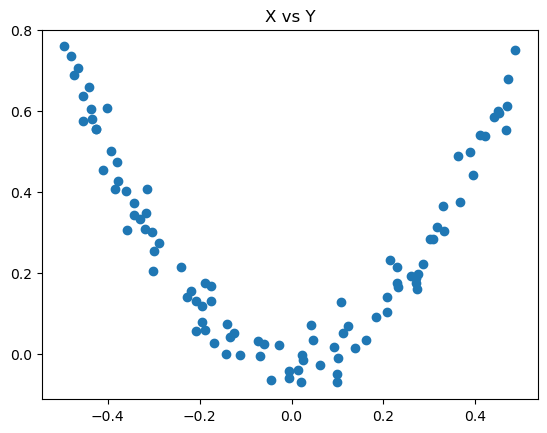

In [77]:
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

##### Model 1 --> Mean

In [78]:
df['pred1'] = df['y'].mean()

In [79]:
df.head()

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458


In [80]:
df['res1'] = df['y'] - df['pred1']

In [81]:
df.head()

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


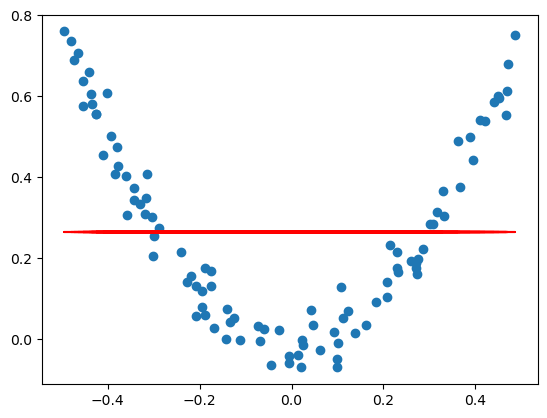

In [82]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

##### Model2 --> Decision Tree

In [83]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8) # max depth of the tree can be between 8 to 32
tree1.fit(X,df['res1'])

DecisionTreeRegressor(max_leaf_nodes=8)

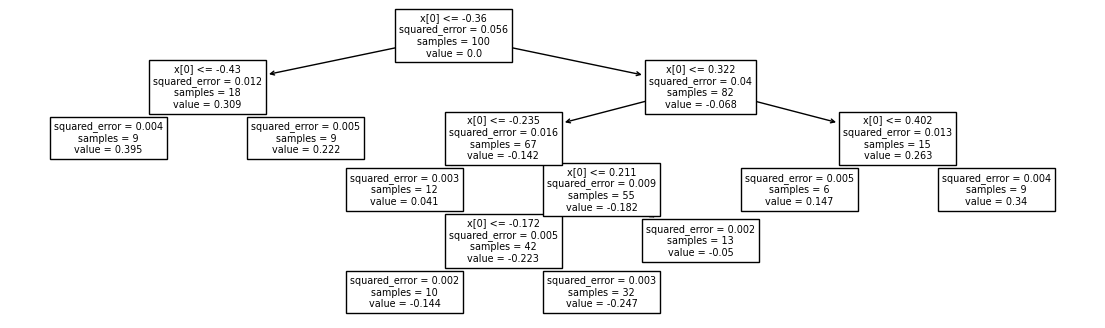

In [84]:
plt.figure(figsize=(14,4))
plot_tree(tree1)
plt.show()

In [85]:
# generating X_test
X_test = np.linspace(-0.5, 0.5, 500)
X_test[:5]

array([-0.5       , -0.49799599, -0.49599198, -0.49398798, -0.49198397])

In [86]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))

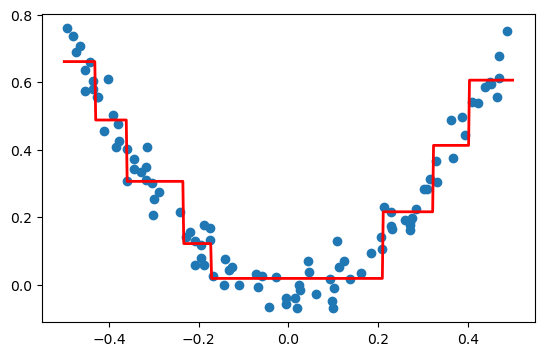

In [87]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [88]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1)) # M1+lr*M2

In [89]:
df.head()

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964


In [90]:
df['res2'] = df['y'] - df['pred2']

In [91]:
df.head()

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022


##### Model3 --> Decision Tree

In [92]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8) # max depth of the tree can be between 8 to 32
tree2.fit(X,df['res2'])

DecisionTreeRegressor(max_leaf_nodes=8)

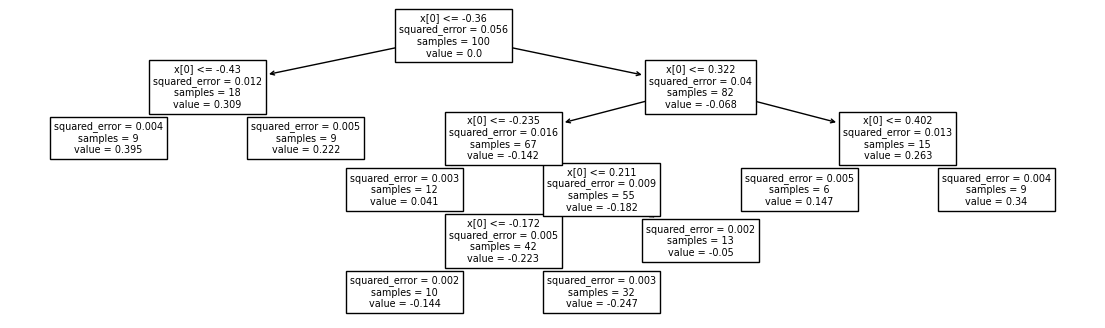

In [93]:
plt.figure(figsize=(14,4))
plot_tree(tree1)
plt.show()

In [94]:
X_test = np.linspace(-0.5, 0.5, 500)
X_test[:5]

array([-0.5       , -0.49799599, -0.49599198, -0.49398798, -0.49198397])

In [95]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

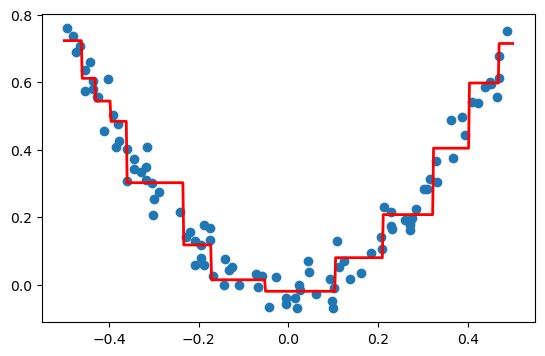

In [96]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])